In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as SeabornInstance

from sklearn.linear_model import LinearRegression

In [2]:
test_data = pd.read_csv('housing_test.csv') # load testing data
test_data.isnull().any() # check for nulls

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

In [3]:
y_test = test_data['MEDV'] # target value (pandas series)
x_test = test_data.drop(columns='MEDV') # all values except target value (pandas dataframe)

In [4]:
train_data = pd.read_csv('housing_train.csv') # load training data
train_data.isnull().any() # check for nulls

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

In [5]:
y_train = train_data['MEDV'] # target value (pandas series)
x_train = train_data.drop(columns='MEDV') # all values except target values (pandas dataframe)

In [6]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.35809,0.0,6.20,1,0.507,6.951,88.5,2.8617,8,307,17.4,391.70,9.71
1,0.15876,0.0,10.81,0,0.413,5.961,17.5,5.2873,4,305,19.2,376.94,9.88
2,0.11329,30.0,4.93,0,0.428,6.897,54.3,6.3361,6,300,16.6,391.25,11.38
3,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
4,25.94060,0.0,18.10,0,0.679,5.304,89.1,1.6475,24,666,20.2,127.36,26.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.28392,0.0,7.38,0,0.493,5.708,74.3,4.7211,5,287,19.6,391.13,11.74
400,0.08664,45.0,3.44,0,0.437,7.178,26.3,6.4798,5,398,15.2,390.49,2.87
401,0.15098,0.0,10.01,0,0.547,6.021,82.6,2.7474,6,432,17.8,394.51,10.30
402,0.22927,0.0,6.91,0,0.448,6.030,85.5,5.6894,3,233,17.9,392.74,18.80


In [7]:
y_train

0      26.7
1      21.7
2      22.0
3      22.9
4      10.4
       ... 
399    18.5
400    36.4
401    19.2
402    16.6
403    23.1
Name: MEDV, Length: 404, dtype: float64

In [8]:
pd.DataFrame(y_train) # display pandas series as dataframe

,MEDV
0,26.7
1,21.7
2,22.0
3,22.9
4,10.4
...,...
399,18.5
400,36.4
401,19.2
402,16.6


In [9]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

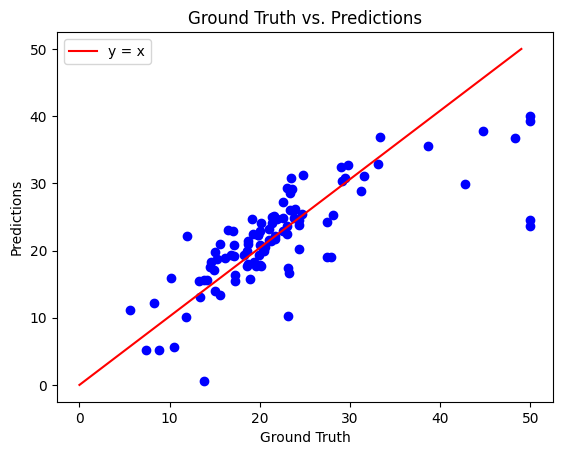

In [10]:
plt.scatter(y_test, y_pred, c='blue')
x = np.linspace(0, 50)
plt.plot(x, color='red', label='y = x')
plt.title('Ground Truth vs. Predictions')
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.legend()
plt.show()

<Axes: xlabel='MEDV', ylabel='Count'>

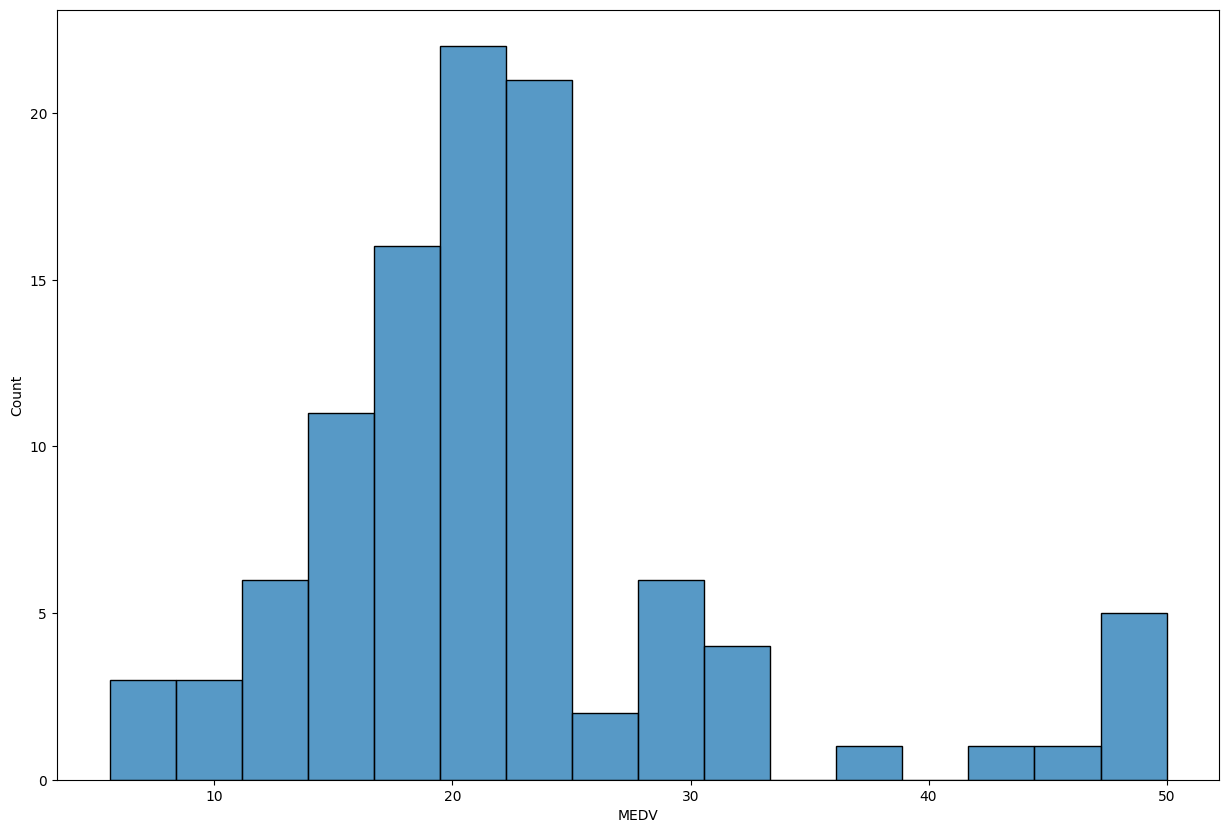

In [11]:
plt.figure(figsize=(15, 10))
plt.tight_layout()
SeabornInstance.histplot(y_test)

In [12]:
df = pd.DataFrame({'Actual': np.array(y_test).flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,22.6,24.889638
1,50.0,23.721411
2,23.0,29.364999
3,8.3,12.122386
4,21.2,21.443823
...,...,...
97,24.7,25.442171
98,14.1,15.571783
99,18.7,17.937195
100,28.1,25.305888


In [13]:
coeff_df = pd.DataFrame(regressor.coef_, x_train.columns, columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.119443
ZN,0.044780
INDUS,0.005485
CHAS,2.340804
NOX,-16.123604
RM,3.708709
AGE,-0.003121
DIS,-1.386397
RAD,0.244178
TAX,-0.010990


In [14]:
# y-intercept
regressor.intercept_

38.091694926303